In [2]:
import numpy as np
import keras
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from keras.models import Sequential
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
#CONSTANTS
NUM_CLASSES = 10
input_shape = (28,28,1)

In [6]:
#NORMALIZTION
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)

In [7]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (4, 4), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (5, 5), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 64)          102464    
                                                                 
 flatten (Flatten)           (None, 64)                0

In [16]:
checkpoint = ModelCheckpoint(filepath='models/DIGITZ_best.h5',
                            #  save_format='keras', 
                             monitor='val_accuracy',  
                             verbose=2, 
                             save_best_only=True)

callbacks = [checkpoint]

In [17]:
history = model.fit(x_train_normalized, 
                    y_train_cat, 
                    epochs=30, 
                    validation_split=0.2,
                    callbacks=callbacks)

Epoch 1/30
1490/1500 [============================>.] - ETA: 0s - loss: 0.0287 - accuracy: 0.9909
Epoch 1: val_accuracy improved from -inf to 0.98625, saving model to models/DIGITZ_best.h5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0286 - accuracy: 0.9910 - val_loss: 0.0464 - val_accuracy: 0.9862
Epoch 2/30
  20/1500 [..............................] - ETA: 8s - loss: 0.0234 - accuracy: 0.9937

/Users/ginger/miniforge3/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1494/1500 [============================>.] - ETA: 0s - loss: 0.0222 - accuracy: 0.9933
Epoch 2: val_accuracy did not improve from 0.98625
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0222 - accuracy: 0.9933 - val_loss: 0.0514 - val_accuracy: 0.9862
Epoch 3/30
1498/1500 [============================>.] - ETA: 0s - loss: 0.0184 - accuracy: 0.9946
Epoch 3: val_accuracy improved from 0.98625 to 0.98867, saving model to models/DIGITZ_best.h5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0184 - accuracy: 0.9946 - val_loss: 0.0405 - val_accuracy: 0.9887
Epoch 4/30
1495/1500 [============================>.] - ETA: 0s - loss: 0.0160 - accuracy: 0.9950
Epoch 4: val_accuracy did not improve from 0.98867
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.0518 - val_accuracy: 0.9874
Epoch 5/30
1492/1500 [============================>.] - ETA: 0s - loss: 0.0121 - accuracy: 0.9961
Epoch 5: val_accuracy di

In [19]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test_normalized, y_test_cat, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Print classification report
y_pred = model.predict(x_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

from sklearn.metrics import classification_report, confusion_matrix
print('\nClassification Report:')
print(classification_report(y_true_classes, y_pred_classes))
cm = confusion_matrix(y_true_classes, y_pred_classes)
print(cm)

313/313 - 1s - loss: 0.0352 - accuracy: 0.9921 - 519ms/epoch - 2ms/step

Test accuracy: 0.9921000003814697
313/313 [==============================] - 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 976    0    0    1    1    0    1    0    1    0]
 [

In [22]:
model_path = 'models/'
if not os.path.exists(model_path):
    os.makedirs(model_path)

In [1]:
model.save(model_path+'digit_recogonizer.keras')

NameError: name 'model' is not defined

In [8]:
import matplotlib.pyplot as plt

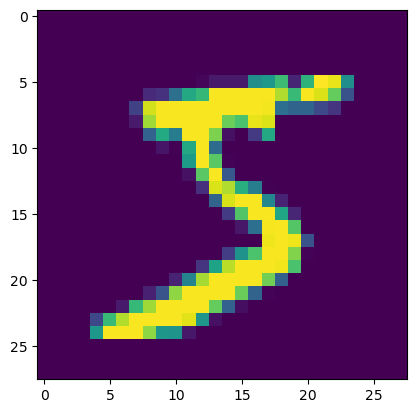

In [9]:
plt.imshow(x_train[0])

In [6]:
mode = keras.saving.load_model('models/1730030314')

In [18]:
model_load = keras.models.load_model('models/DIGITZ_best.h5')

In [19]:
# Evaluate the model
test_loss, test_acc = model_load.evaluate(x_test_normalized, y_test_cat, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Print classification report
y_pred = model_load.predict(x_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

from sklearn.metrics import classification_report, confusion_matrix
print('\nClassification Report:')
print(classification_report(y_true_classes, y_pred_classes))
cm = confusion_matrix(y_true_classes, y_pred_classes)
print(cm)

313/313 - 1s - loss: 0.0395 - accuracy: 0.9922 - 618ms/epoch - 2ms/step

Test accuracy: 0.9922000169754028
313/313 [==============================] - 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 978    0    0    0    0    0    1    1    0    0]
 [